**CSE 512 Spring 2021 - Machine Learning - Homework 2**


---


Your Name: Irfan Ahmed \\
Solar ID : 113166464 \\
NetID Email: irfan.ahmed@stonybrook.edu

In [ ]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/CSE512_ML/HW2/

/content/gdrive/MyDrive/Colab Notebooks/CSE512_ML/HW2


In [ ]:
import numpy as np
import random 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from numba import jit

In [ ]:
# Parameters :
'''
1. X -> column vector (d x 1)
2. X_bar -> appending 1 at end ( d+1 x 1)
3. theta_i -> (d+1 x 1) [ theta_1 to theta_k-1], theta (k-1 x d+1)
4. W -> learned weight matrix ( k-1 x d), W_i is learned weight vector of theta_i
5. b -> biases ( k-1 x 1 )
6. X ->  test data ( n x d)



'''

'\n1. X -> column vector (d x 1)\n2. X_bar -> appending 1 at end ( d+1 x 1)\n3. theta_i -> (d+1 x 1) [ theta_1 to theta_k-1], theta (k-1 x d+1)\n4. W -> learned weight matrix ( k-1 x d), W_i is learned weight vector of theta_i\n5. b -> biases ( k-1 x 1 )\n6. X ->  test data ( n x d)\n\n\n\n'

In [ ]:
def logreg_predict_prob(W, b, X):
    theta_transpose = np.append(W,b.reshape(-1,1), axis = 1)  # reshape b if necessary b.reshape(-1,1)
    
    # theta_transpose ( k-1 x d+1)
    # append 1 to X -> X_bar (n x d+1)
    X_bar  = np.append(X, np.ones((len(X),1)), axis = 1)
    
    P = np.zeros((len(X),len(theta_transpose) + 1)) # n x k
    
    for i in range(len(X)): # 1 to n
        A = np.zeros(len(theta_transpose) + 1) # k
        for j in range(len(W)): # 1 to k-1
            # P (Y =j|X; theta_transpose) 
            A[j] = np.dot(theta_transpose[j],X_bar[i])
        A = np.exp(A - np.max(A))
        A = A/np.sum(A)
        P[i] = A
    
    return P

In [ ]:
def logreg_predict_class(W, b, X):
    P = logreg_predict_prob(W, b, X)
    y_hat = P.argmax(axis = 1).reshape(-1,1)
    return y_hat

In [ ]:
def permute(end):
    array = np.arange(end)
    random.shuffle(array)
    return array.astype(np.int)
    

In [ ]:
def separate_theta_W_b(theta): # theta is k-1 x d+1
    W = theta[:,:-1]
    b = theta[:,-1].reshape(-1,1)
    return W,b

In [ ]:
def loss_theta(X,y,theta):
    W,b = separate_theta_W_b(theta)
    P = logreg_predict_prob(W,b,X)
    loss = 0.0 
    for i in range(len(X)):
            loss+= np.log(P[i,y[i]])

    return (-1/len(X)) * loss

In [ ]:
def gradient_descent(X,y,batch,theta):
    
    W,b = separate_theta_W_b(theta)
    P = logreg_predict_prob(W,b,X)
    result = np.zeros(theta.shape)
    for i in range(len(theta)):
        descent = np.zeros(X.shape[1] + 1) 
        for j in batch:
            if(y[j] == i):
                descent = descent +  (1 - P[j,i]) * (np.append(X[j],[1]))
            else : 
                descent = descent + (0 - P[j,i]) * (np.append(X[j],[1]))
        
        result[i] = descent 
                             
    return result* (-1/len(batch))

In [ ]:
def logreg_fit(X, y, m, eta_start, eta_end, epsilon, max_epoch = 1000):
    # permute
    array = permute(len(X))
    
    # dividing into batches
    batches = np.array_split(array,m)
    
    # obtain k-value
    k = np.max(y) + 1 
    d = X.shape[1] # no. of features
    
    theta = np.zeros((k-1,d+1))
    Loss_list = []
    eta = eta_start
    
    for epoch in range(max_epoch):
        theta_old = theta
        for batch in batches:
            dL_dtheta = gradient_descent(X,y,batch,theta)
            # update theta
            theta = theta - eta*dL_dtheta
        
        loss_theta_old = loss_theta(X,y,theta_old)
        loss_theta_current = loss_theta(X,y,theta) 
        Loss_list.append(loss_theta_current)
        
        if( (loss_theta_old - loss_theta_current) < (epsilon * loss_theta_old) ):
            eta = eta/10
        if(eta < eta_end):
            break
        print("\nCompleted epoch: " + str(epoch))
    W,b = separate_theta_W_b(theta)
    Loss_list = np.array(Loss_list)
    return W,b,Loss_list

In [ ]:
def get_data(path):
    covid_data = pd.read_csv(path)
    covid_data = covid_data.to_numpy()
    X = covid_data[:,:-1].astype(np.float64)
    y = covid_data[:,-1].astype(int)
    return X,y

In [ ]:
def preprocess_data(X,Y):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    Y = scaler.transform(Y)
    
    return X,Y

In [ ]:
X_train, y_train = get_data('train.csv')
X_test, y_test = get_data('test.csv')

X_train, X_test = preprocess_data(X_train,X_test)

print(len(X_train[0]))
print(X_test)


95
[[-0.99350877  1.40401609 -0.0895731  ... -0.83658652 -0.65059586
   1.1891063 ]
 [-0.99350877  1.40401609 -0.0895731  ... -0.83658652 -0.65059586
   1.1891063 ]
 [-0.99350877  1.40401609 -0.0895731  ... -0.83658652 -0.65059586
   1.1891063 ]
 ...
 [-0.99350877  2.01557903 -0.0895731  ... -0.83658652  1.53705251
  -0.84096771]
 [-0.99350877  2.07117566 -0.0895731  ... -0.83658652 -0.65059586
   1.1891063 ]
 [-0.99350877  2.12677229 -0.0895731  ... -0.83658652 -0.65059586
   1.1891063 ]]


**Running the model to fit our training set.**

---






In [ ]:
# logreg_fit(X, y, m, eta_start, eta_end, epsilon, max_epoch = 1000):
W,b,Loss_list = logreg_fit(X_train, y_train, 256, 0.01, 0.00001, 0.0001,10)


Completed epoch: 0

Completed epoch: 1

Completed epoch: 2

Completed epoch: 3

Completed epoch: 4

Completed epoch: 5

Completed epoch: 6

Completed epoch: 7

Completed epoch: 8

Completed epoch: 9


**Plotting the Loss function**

---



[0 1 2 3 4 5 6 7 8 9]
[0.37995643 0.28324529 0.23867009 0.21395191 0.19847911 0.18794603
 0.18032802 0.17456329 0.17004653 0.16640926]


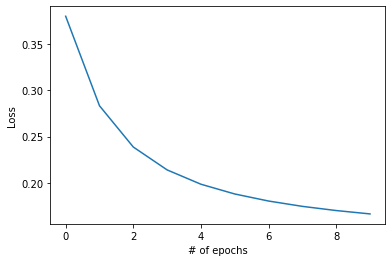

In [ ]:
plot_x = np.arange(len(Loss_list))
print(plot_x)
print(Loss_list)
plot_y = Loss_list 
plt.xlabel('# of epochs')
plt.ylabel('Loss')
plt.plot(plot_x,plot_y)
plt.show()

2.3.c) The values of hyperparameters chosen are 
eta_start = 0.1(Increased), m = 512(Doubled) eta_end = 0.00001, max_epochs = 40. 

Training Data : 


---




*   Accuracy Score: 0.9439218523878437
*   Accuracy from confusion matrix: 0.7551306966844182



Testing Data :


---


*   Accuracy Score: 0.9117221418234442
*   Accuracy from confusion matrix: 0.6426040494938133






With these new values, the number of epochs taken to converge is around 40 and same accuracy with original values. 
Reasoning behind chosing these values comes from 2.3.b,where increasing eta and increasing m maintained same accuracy but converged faster. Hence the early stopping was identified and used in this hyperparameters. 

Other approaches such as Grid search and Random search can be used for hyperparameter optimisation but the computations are taking a toll. 

2.3.2.b)Increasing (eta_start)learning rate(0.1), decreases my loss function faster and converges earlier (at 30). The accuracy on testing data increased to 91.7% (earlier 90.5%). 
Decreasing learning rate(0.001), increases no of epochs to converge. The accuracy remains same with slight difference. 


Decreasing batch size(100) decreases convergence rate of my loss function and the epochs have increased. Final performance is lowered a little bit. Increasing batch size(doubled now) maintained the same final performance but the loss converged at 30 epochs(earlier). 

Increasing eta_end, increases the no of epochs keeping the performance nearly same as original params. It looks like the model reaches the same performance but slowly.

Decreasing max epochs (<20) does not coverge the loss function. Increasing the max epochs gives no meaning as loss converges and no point in training further. 




Without feature normalization, the model is increasing in loss and then converging. The number of epochs have reduced are now being dependent on eta_start and eta_end. It implies that the loss is not converging but decreasing the learning rate in this regard. Changing eta_end to 10^-12 shows loss has increased to a certain level and converged there. The final performance of the model has been decreased but nothing significant.

With increasing epochs, the loss function converges to a constant value and does not increase or decrease much from the previous value. From the graph it can be observed that beyond 40 epochs, there is no use training the model further as the loss has converged.


**Obtain Predictions for Training and Testing Data**

---



In [ ]:
y_train_pred = logreg_predict_class(W,b,X_train)
y_test_pred = logreg_predict_class(W,b,X_test) 

#print(y_test_pred.reshape(1,-1))
#print(y_test.reshape(1,-1))

***Performance Metrics***


*   Accuracy
*   Confusion Matrix
*   Accuracy from Confusion Matrix



---



In [ ]:
def report_results(y,y_hat):
    accuracy_metric = accuracy_score(y, y_hat)
    confusion = confusion_matrix(y, y_hat, normalize = 'true')
    trace_CM = np.trace(confusion)
    total_population = np.sum(confusion)
    accuracy = trace_CM/total_population
    
    print("\nPerformance Metrics:")
    print("\nAccuracy Score:" + str(accuracy_metric))

    print("\n Confusion Matrix : ")
    print(confusion)

    print("\n Accuracy from confusion matrix:" + str(accuracy))

    #return accuracy_metric, confusion, accuracy

In [ ]:
print("----------Training Data----------\n")
report_results(y_train,y_train_pred)

print("----------Testing Data----------\n")
report_results(y_test,y_test_pred)

#report_results(y_train,y_train_pred)

----------Training Data----------


Performance Metrics:

Accuracy Score:0.9417510853835022

 Confusion Matrix : 
[[0.98457888 0.01542112]
 [0.51914894 0.48085106]]

 Accuracy from confusion matrix:0.7327149743822721
----------Testing Data----------


Performance Metrics:

Accuracy Score:0.91027496382055

 Confusion Matrix : 
[[0.97007874 0.02992126]
 [0.76785714 0.23214286]]

 Accuracy from confusion matrix:0.6011107986501687


In [ ]:
def avg_precision_and_precision_recall_curve(X,y,W,b):
    P = logreg_predict_prob(W, b, np.array(X))
    y_score = []
    #X = [X[i] for i in range(X.shape[0]) if y[i] == 1]
    #y_score = logreg_predict_class(W,b,X)
    for i in range(len(X)):
      y_score.append(P[i,1])

    
    #y = [y[i] for i in range(len(y)) if y[i] == 1] 
    #y_score = [y_score[i] for i in range(len(y)) if y[i] == 1 ]
    #print(accuracy_score(y,y_score))
    #print(y_score)
    y,y_score = np.array(y), np.array(y_score,dtype=np.float32)
    y = y.flatten()
    y_score = y_score.flatten()

    avg_prec_score = average_precision_score(y, y_score)
    precision, recall, thresholds = precision_recall_curve(y, y_score)

    #precision = [precision[i] for i in range(len(y)-1) if y[i] == 1]
    #recall = [recall[i] for i in range(len(y)-1) if y[i] == 1]
    
    print("Average Precision Score: " + str(avg_prec_score))
    
    
    plt.plot(recall, precision)
    plt.xlabel('Recall (Positive label : 1)')
    plt.ylabel('Precision (Positive label : 1)')
    plt.show()
    
    #disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    #disp.plot() 
    

    return avg_prec_score, precision, recall, thresholds
    

Average Precision Score: 0.31201202916949466


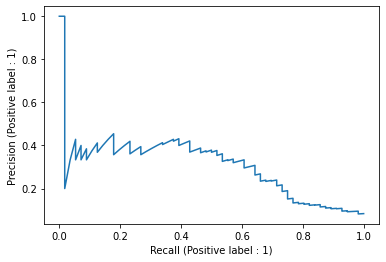

(0.31201202916949466,
 array([0.08358209, 0.08221226, 0.08233533, 0.08245877, 0.08258258,
        0.08270677, 0.08283133, 0.08295626, 0.08308157, 0.08320726,
        0.08333333, 0.08345979, 0.08358663, 0.08371385, 0.08384146,
        0.08396947, 0.08409786, 0.08422665, 0.08435583, 0.08448541,
        0.08461538, 0.08474576, 0.08487654, 0.08500773, 0.08513932,
        0.08527132, 0.08540373, 0.08553655, 0.08566978, 0.08580343,
        0.0859375 , 0.08607199, 0.0862069 , 0.08634223, 0.08647799,
        0.08661417, 0.08675079, 0.08688784, 0.08702532, 0.08716323,
        0.08730159, 0.08744038, 0.08757962, 0.0877193 , 0.08785942,
        0.088     , 0.08814103, 0.0882825 , 0.08842444, 0.08856683,
        0.08870968, 0.08885299, 0.08899676, 0.089141  , 0.08928571,
        0.08943089, 0.08957655, 0.08972268, 0.08986928, 0.09001637,
        0.09016393, 0.09031199, 0.09046053, 0.09060956, 0.09075908,
        0.09090909, 0.0910596 , 0.09121061, 0.09136213, 0.09151414,
        0.09166667, 0.0918

In [ ]:
avg_precision_and_precision_recall_curve(X_test,y_test,W,b)